In [39]:
import os

from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
image = imread('../../book-files/images/unsupervised_learning/ladybug.png')
image.shape

(533, 800, 3)

In [12]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [59]:
km = KMeans(n_clusters=12)
km.fit(X)

segmented_img = km.cluster_centers_[km.labels_]
segmented_img = segmented_img.reshape(image.shape)

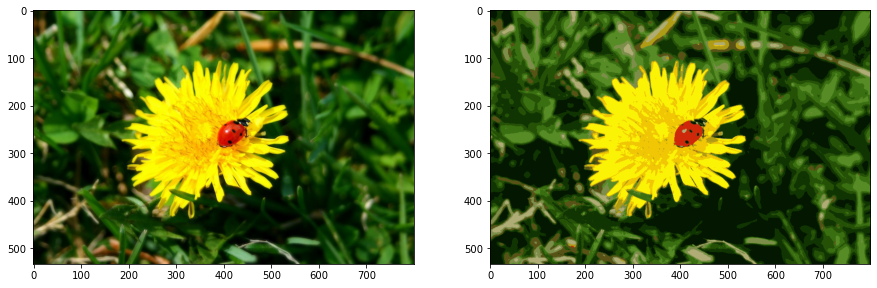

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
axs[0].imshow(image)
axs[1].imshow(segmented_img)

In [61]:
idxs, _ = list(StratifiedShuffleSplit(n_splits=1, train_size=0.01).split(X, km.labels_))[0]

X_sample = X[idxs,:]
y_sample = km.labels_[idxs]

scores = silhouette_samples(X_sample, y_sample)

mean_score = scores.mean()

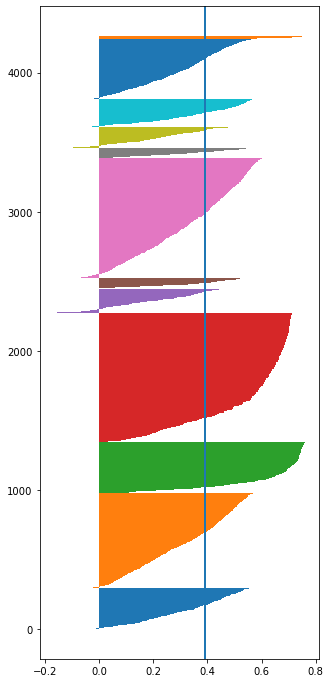

In [62]:
fig, ax = plt.subplots(figsize=(5,12))

y_0 = 0
for label in np.unique(y_sample):
    label_idxs = np.argwhere(y_sample == label)
    plot_xs = np.sort(scores[label_idxs].flatten())
    
    n_label_samples = len(label_idxs)
    plot_ys = range(y_0, y_0+n_label_samples)
    y_0 = y_0 + n_label_samples
    
    ax.barh(plot_ys, plot_xs, height=1)
    ax.axvline(mean_score)